In [2]:
# Imports
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from IPython.display import Image, display
import seaborn as sns
import cv2
import numpy as np
import matplotlib.gridspec as grid


C:\Users\Boris\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Boris\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

In [1]:
def pca_num(data, labels, k=None):
    """
    pca()
    performs PCA on the given numerical data. Outputs the k principal components.
    """

    # Normalize the data
    normalized_data = pd.DataFrame(StandardScaler().fit_transform(data.iloc[: , 1:]))

    # Perform pca
    pca = PCA(n_components=k)
    principal_components = pd.DataFrame(pca.fit_transform(normalized_data))
    principal_components
    result = pd.concat([principal_components, labels["Class"]], axis = 1)

    # Return the k principal components
    return result


In [ ]:
def pca_img(data, labels, k=None):
    """
    pca()
    performs PCA on the given image data. Outputs the k principal components.
    """

    # Normalize the data
    

    # Perform pca
    

    # Return the k principal components
    return result

image size =  (333, 500)
(499500, 3)
(499500, 3)


Dispalying colour image of the scene


(-0.5, 499.5, 332.5, -0.5)

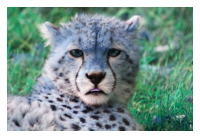

In [99]:
# Read RGB image into an array
img = cv2.imread(f'C:/Users/Boris/Google Drive/Studie/Master/2021-2022-1B/Pattern Recognition/pattern-recognition-a2/data/BigCats/Cheetah/animal-africa-wilderness-zoo.jpg')
img_shape = img.shape[:2]
print('image size = ',img_shape)

# 3 dimensional dummy array with zeros
MB_img = np.zeros((img_shape[0],img_shape[1],3))

# stacking up images into the array
MB_img[:,:,:] = cv2.imread(f'C:/Users/Boris/Google Drive/Studie/Master/2021-2022-1B/Pattern Recognition/pattern-recognition-a2/data/BigCats/Cheetah/animal-africa-wilderness-zoo.jpg')
MB_matrix = np.zeros((MB_img[:,:,:].size,3))
# print(len(MB_matrix))
print(MB_matrix.shape)
for i in range(3):
    MB_array = MB_img[:,:,:].flatten()  # covert 2d to 1d array 
    MB_arrayStd = (MB_array - MB_array.mean())/MB_array.std()  
    MB_matrix[:,i] = MB_arrayStd
print(MB_matrix.shape)


# Let's take a look at scene
print('\n\nDispalying colour image of the scene')
plt.figure(figsize=(img_shape[0]/100,img_shape[1]/100))
plt.imshow(img, vmin=0, vmax=255)
plt.axis('off')

# fig,axes = plt.subplots(2,4,figsize=(50,23),sharex='all', sharey='all')
# fig.subplots_adjust(wspace=0.1, hspace=0.15)
# fig.suptitle('Intensities at Different Bandwidth in the visible and Infra-red spectrum', fontsize=30)
# axes = axes.ravel()

# for i in range(n_bands):
#     # axes[i].imshow(MB_img[:,:,i],cmap='gray', vmin=0, vmax=255)
#     axes[i].imshow(img, vmin=0, vmax=255)
#     axes[i].set_title('band '+str(i+1),fontsize=25)
#     axes[i].axis('off')
# fig.delaxes(axes[-1])

In [3]:
dir_path = os.getcwd()
data = pd.read_csv(f'C:/Users/Boris/Google Drive/Studie/Master/2021-2022-1B/Pattern Recognition/pattern-recognition-a2/data/genes/data.csv')
labels = pd.read_csv(f'C:/Users/Boris/Google Drive/Studie/Master/2021-2022-1B/Pattern Recognition/pattern-recognition-a2/data/genes/labels.csv')

result = pca_num(data, labels, 2)
result

,0,1,Class
0,-57.446987,95.410981,PRAD
1,-16.919430,0.732470,LUAD
2,-70.345217,-19.303326,PRAD
3,-49.161591,-9.227586,PRAD
4,-18.132534,-51.327797,BRCA
...,...,...,...
796,-12.417385,-42.321573,BRCA
797,-29.415554,28.526281,LUAD
798,-4.133090,15.690014,COAD
799,-30.814758,33.526423,PRAD


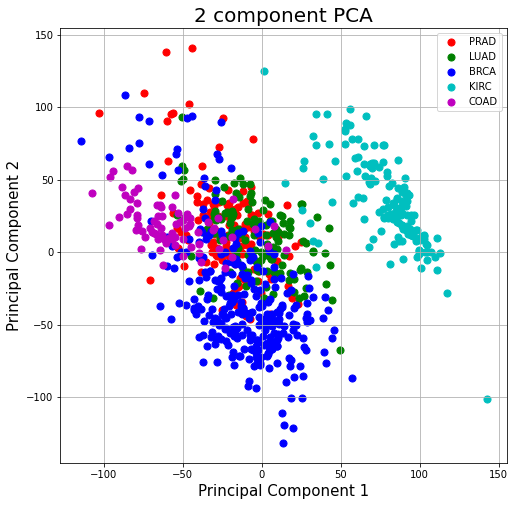

In [60]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = result["Class"].unique().tolist()
colors = ['r', 'g', 'b', 'c', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = result['Class'] == target
    ax.scatter(result.loc[indicesToKeep, 0]
               , result.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()